Getting the btsettl PHOENIX models for the MM stars

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from scipy.interpolate import interp1d
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from scipy.optimize import leastsq
import astropy.constants as const
from astropy.convolution import convolve, Box1DKernel
from astropy.modeling import models, fitting
import prepare_phoenix as pp

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
params = Table.read('stellar_parameters.csv')

In [3]:
params

Target,RAJ2000,DEJ2000,Jmag,J_e,Hmag,H_e,Kmag,K_e,Rmag,R_e,spt,L_bol,L_bol_e,Mass,Mass_e,Radius,Radius_e,Teff,Teff_e,parallax,distance,P_rot_d
str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64
GJ 1132,153.716027,-47.156796,9.245,0.026,8.666,0.031,8.322,0.027,13.098,0.11,M3.5,1.67e+31,5e+29,0.194,0.005,0.215,0.009,3196,72,83.07,12.03804021,126.59
GJ 676A,262.546646,-51.637012,6.711,0.02,6.082,0.024,5.825,0.029,8.675,0.012,M0,3.404e+32,8.3e+30,0.631,0.017,0.62,0.03,4014,94,63.07,15.85539876,41.2
GJ 15A,4.594036,44.022842,5.252,0.264,4.476,0.2,4.018,0.02,7.9,0.012,M1,8.61e+31,7e+29,0.393,0.009,0.385,0.002,3601,12,280.74,3.562014676,-1.0
GJ 649,254.536873,25.74423,6.448,0.021,5.865,0.02,5.624,0.016,8.685,0.012,M1,1.674e+32,1.7e+30,0.524,0.012,0.531,0.012,3621,41,96.38,10.3755966,-1.0
GJ 163,62.315307,-53.373737,7.948,0.026,7.428,0.04,7.135,0.021,10.734,0.012,M3.5,8.28e+31,2.4e+30,0.405,0.01,0.409,0.017,3460,76,66.59,15.01726986,61.0
GJ 849,332.417906,-4.640765,6.51,0.024,5.899,0.044,5.594,0.017,9.279,0.012,M3.5,1.105e+32,1e+30,0.465,0.011,0.464,0.018,3492,70,113.25,8.830022075,39.2
GJ 674,262.166316,-46.89513,5.711,0.019,5.154,0.033,4.855,0.018,8.337,0.012,M2.5,6.03e+31,1.4e+30,0.353,0.008,0.361,0.012,3404,59,220.24,4.540501271,32.9
GJ 699,269.452044,4.694597,5.244,0.02,4.834,0.034,4.524,0.02,8.298,0.012,M4,1.3e+31,2e+29,0.161,0.004,0.187,0.001,3223,17,548.31,1.823785815,130.4
L 980-5,215.313034,-1.122204,8.948,0.03,8.391,0.031,8.093,0.026,13.02,0.15,M3.5,2.49e+31,8e+29,0.232,0.006,0.25,0.01,3278,74,74.66,13.39405304,92.23


In [4]:
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
for m, r, t in zip(params['Mass'], params['Radius'], params['Teff']):
    g = G*(m*M)/(r*R)**2
    g =  g.to(u.cm/u.s**2)
    print(t,np.log10(g.value))
    #print(logg)

3196 5.060992437402149
4014 4.65331360755076
3601 4.861538718661559
3621 4.707209872123922
3460 4.822076034503119
3492 4.772484619083325
3404 4.87082792887964
3223 5.101210290261985
3278 5.007675594849958
3119 5.113824503742217
3248 5.083980902336978
2619 5.292907918630075


[[3100, 3200], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3100, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3100, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte031.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte031.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


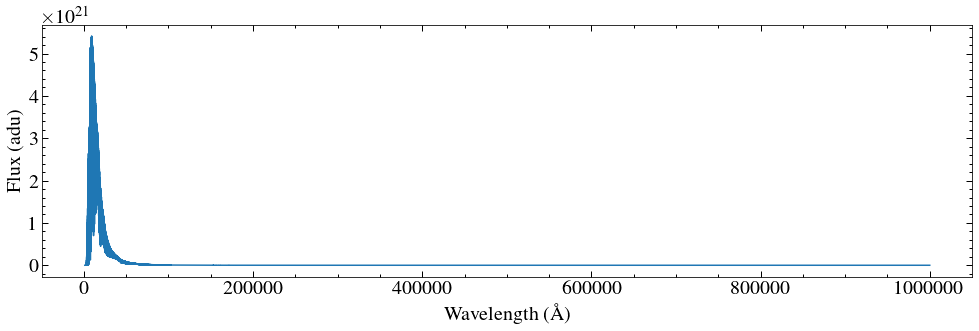

[[4000, 4100], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 4000, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 4000, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 4100, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 4100, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte040.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte040.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte041.0-4.5-0.0a+0.0.BT-Settl.spec.7
File Badly Formatted --- trying again...
lte041.0-5.0-0.0a+0.0.BT-Settl.spec.7
File Badly Formatted --- trying again...
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1192401 1000.0 1000000.0
1192401 1000.0 1000000.0


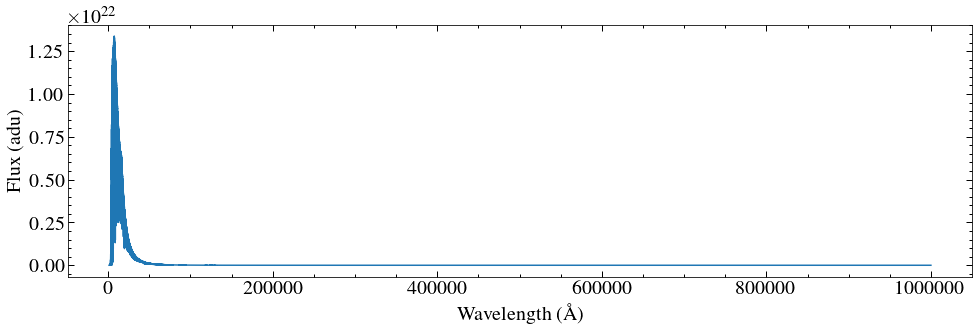

[[3600, 3700], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3600, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3600, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3700, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3700, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte036.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte036.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte037.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


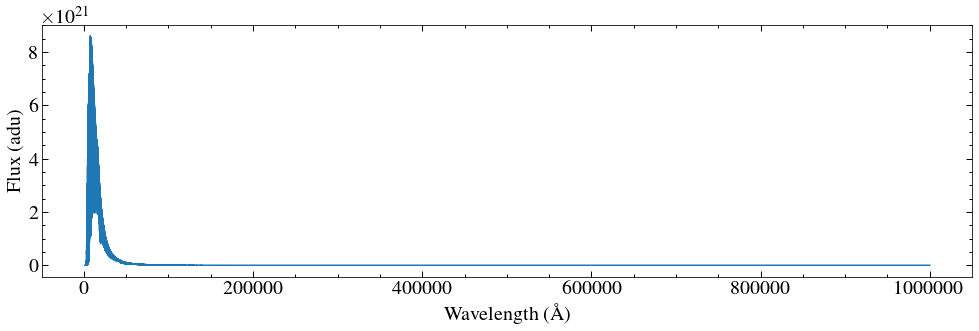

[[3600, 3700], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3600, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3600, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3700, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3700, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte036.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte036.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte037.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte037.0-5.0-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


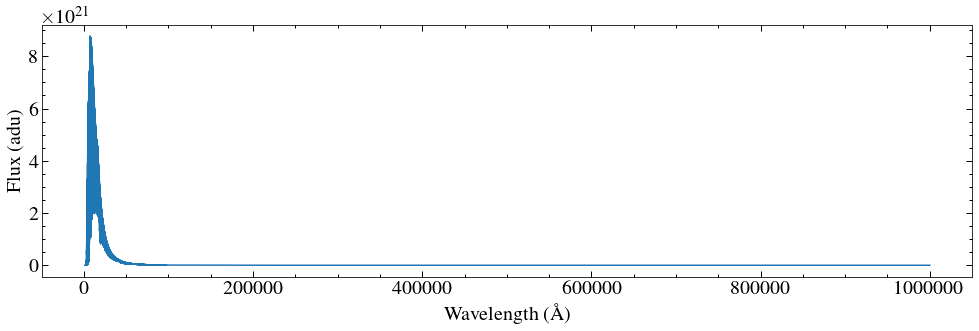

[[3400, 3500], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3400, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3400, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte035.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


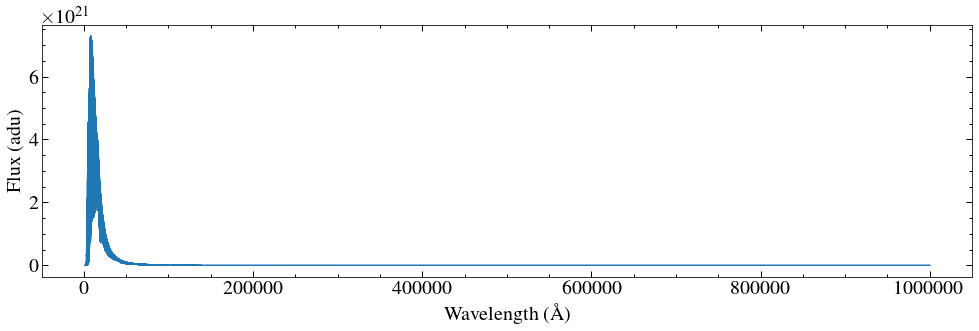

[[3400, 3500], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3400, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3400, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte035.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


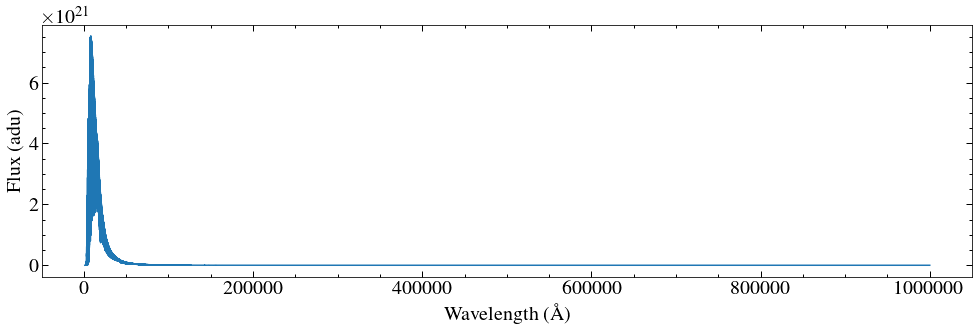

[[3400, 3500], [4.5, 5.0], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3400, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3400, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 4.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3500, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}]
lte034.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte034.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte035.0-4.5-0.0a+0.0.BT-Settl.spec.7
lte035.0-5.0-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


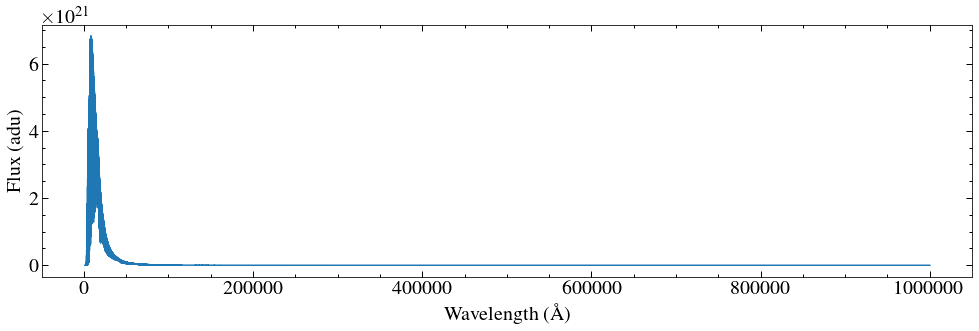

[[3200, 3300], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.5-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


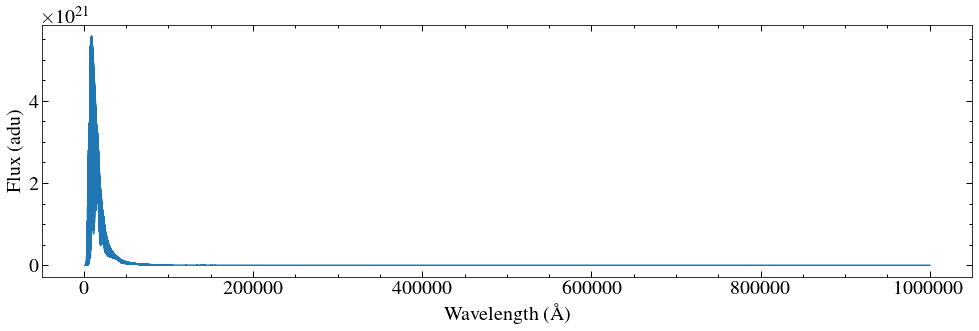

[[3200, 3300], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.5-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


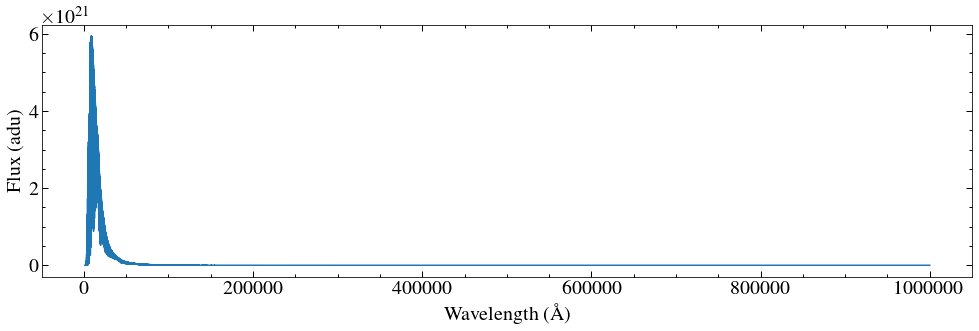

[[3100, 3200], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3100, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3100, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte031.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte031.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


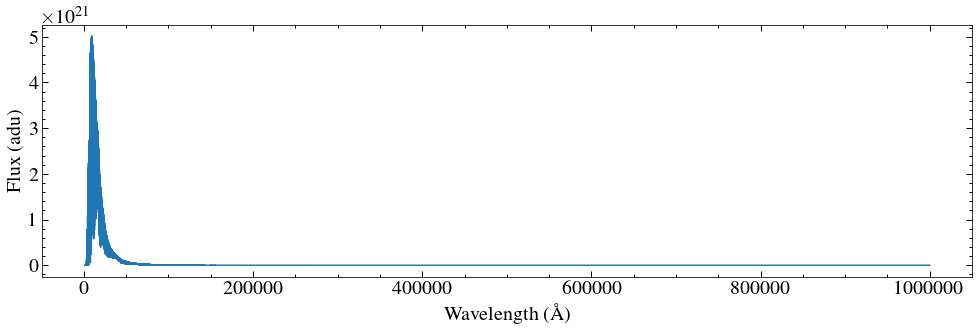

[[3200, 3300], [5.0, 5.5], [0.0, 0.0], [0.0, 0.0]]
[{'Teff': 3200, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3200, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.0, 'FeH': 0.0, 'aM': 0.0}, {'Teff': 3300, 'logg': 5.5, 'FeH': 0.0, 'aM': 0.0}]
lte032.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte032.0-5.5-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.0-0.0a+0.0.BT-Settl.spec.7
lte033.0-5.5-0.0a+0.0.BT-Settl.spec.7
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0
1312401 1000.0 1000000.0


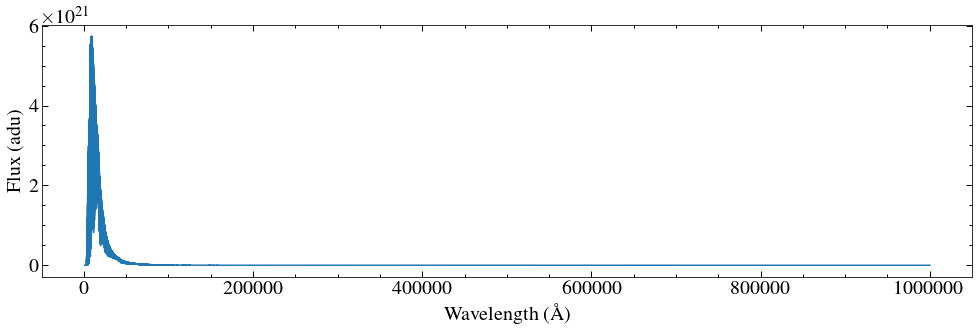

In [12]:
###### pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=False, plot=False)
#star_params = {'Teff': 2628, 'logg': 5.21, 'FeH': 0.00, 'aM': 0, 'radius':1.16*u.R_jup, 'distance':12.43*u.pc}
G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
save_path = 'interpolated_models/'
repo = '/media/david/5tb_storage1/muscles/btsettl_models/'
for row in params:
    star = row['Target']
    if star != 'Trappist-1':# and star == 'GJ 15A':
        g = (G*(row['Mass']*M)/(row['Radius']*R)**2).to(u.cm/u.s**2)
        star_params = {'Teff': row['Teff'], 'logg': np.log10(g.value), 'FeH': 0.00, 'aM': 0, 'Radius':row['Radius']*u.R_sun, 'Distance':row['distance']*u.pc}
        
        pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True)

In [6]:
glob.glob('interpolated_models/*ecsv')

['interpolated_models/GJ_674_phoenix_interpolated.ecsv',
 'interpolated_models/GJ849_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_699_phoenix_interpolated.ecsv',
 'interpolated_models/GJ674_phoenix_interpolated.ecsv',
 'interpolated_models/GJ676A_phoenix_interpolated.ecsv',
 'interpolated_models/GJ729_phoenix_interpolated.ecsv',
 'interpolated_models/LHS_2686_phoenix_interpolated.ecsv',
 'interpolated_models/GJ649_phoenix_interpolated.ecsv',
 'interpolated_models/GJ1132_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_649_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_15A_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_676A_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_849_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_163_phoenix_interpolated.ecsv',
 'interpolated_models/LHS2686_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_729_phoenix_interpolated.ecsv',
 'interpolated_models/GJ_1132_phoenix_interpolated.ecsv',
 'interpolated_models/GJ163_ph

OrderedDict([('LOGG', 4.772484619083325), ('NORMFAC', <Quantity 1.40363859e-18>), ('TEFF', 3492)])
OrderedDict([('LOGG', 4.87082792887964), ('NORMFAC', <Quantity 3.21328848e-18>), ('TEFF', 3404)])
OrderedDict([('LOGG', 4.65331360755076), ('NORMFAC', <Quantity 7.77270093e-19>), ('TEFF', 4014)])
OrderedDict([('LOGG', 5.083980902336978), ('NORMFAC', <Quantity 2.30537051e-18>), ('TEFF', 3248)])
OrderedDict([('LOGG', 4.707209872123922), ('NORMFAC', <Quantity 1.33139157e-18>), ('TEFF', 3621)])
OrderedDict([('LOGG', 5.060992437402149), ('NORMFAC', <Quantity 1.62146753e-19>), ('TEFF', 3196)])
OrderedDict([('LOGG', 5.113824503742217), ('NORMFAC', <Quantity 9.75113133e-20>), ('TEFF', 3119)])
OrderedDict([('LOGG', 4.822076034503119), ('NORMFAC', <Quantity 3.77057481e-19>), ('TEFF', 3460)])
OrderedDict([('LOGG', 5.007675594849958), ('NORMFAC', <Quantity 1.77091985e-19>), ('TEFF', 3278)])
OrderedDict([('LOGG', 4.861538718661559), ('NORMFAC', <Quantity 5.93844811e-18>), ('TEFF', 3601)])
OrderedDict(

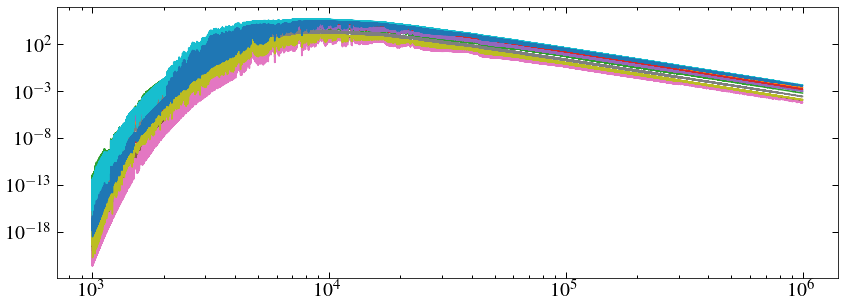

In [13]:
specs = glob.glob('interpolated_models/*ecsv')
for sp in specs:
    data = Table.read(sp)
    print (data.meta)
    plt.plot(data['WAVELENGTH'], data['FLUX']*data.meta['NORMFAC'])
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(800, 1e7)
    #plt.ylim(1e-6, 1e25)

OrderedDict([('LOGG', 4.861538718661559), ('NORMFAC', <Quantity 5.93844811e-18>), ('TEFF', 3601)])


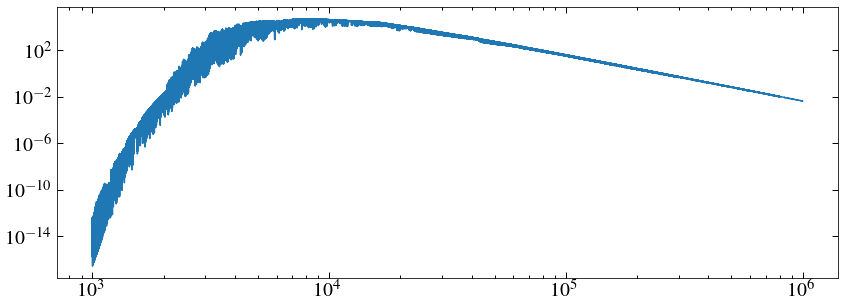

In [11]:
data = Table.read('interpolated_models/GJ15A_phoenix_interpolated.ecsv')
print(data.meta)
plt.plot(data['WAVELENGTH'], data['FLUX']*data.meta['NORMFAC'])
plt.xscale('log')
plt.yscale('log')

In [ ]:
plt.plot(data['WAVELENGTH'], data['FLUX'])
plt.xscale('log')
plt.yscale('log')
plt.xlim(800, 2000)
plt.ylim(1e2, 1e20)

In [ ]:
"""def extract_spectrum(filepath):
    """
  #  Extracts the spectrum from the Lyon files, which is non-trivial. Adapts code by JSP. 
    """
    #nameout = unzip_file(filepath)
    wavemin, wavemax, DF = 0, 3000, 8
    """
 #   phoenixR = ascii.read(filepath,format="fixed_width_no_header",col_starts=(0,14),col_ends=(12,25),delimiter=" ",names=('Wave','Spec'))
 #   ph1, jj = np.unique(np.array(phoenixR['Wave']),return_index=True)
 #   phoenix = np.zeros((len(ph1),2))
 #   for kk in range(len(jj)):
  #      line = phoenixR['Spec'][jj[kk]]
        #if kk < 10:
         #   print(line)
  #      if line[-1] == '-':
   #         line = line[:-1]
 #       phoenix[kk,1] = np.float64(line.replace("D","E"))
   # phoenix[:,0] = ph1
    """     
    try:
        phoenixR = ascii.read(filepath,format="fixed_width_no_header",col_starts=(0,14),col_ends=(12,25),delimiter=" ",names=('Wave','Spec'))
        ph1, jj = np.unique(np.array(phoenixR['Wave']),return_index=True)
        phoenix = np.zeros((len(ph1),2))
        for kk in range(len(jj)):
            phoenix[kk,1] = np.float64(phoenixR['Spec'][jj[kk]].replace("D","E"))
        phoenix[:,0] = ph1
    except:
            try:
                print("File Badly Formatted --- trying again...")
                phoenixR = ascii.read(filepath,format="fixed_width_no_header",col_starts=(0,13),col_ends=(12,24),delimiter=" ",names=('Wave','Spec'))
                ph1, jj = np.unique(np.array(phoenixR['Wave']),return_index=True)
                phoenix = np.zeros((len(ph1),2))
                for kk in range(len(jj)):
                    phoenix[kk,1] = np.float64(phoenixR['Spec'][jj[kk]].replace("D","E"))
                phoenix[:,0] = ph1
            except:
                print("... and again ... ")
                phoenixR = ascii.read(filepath,format="no_header",delimiter=" ")
                temp = np.zeros(len(phoenixR['col1']))
                for kk in range(len(temp)):
                    temp[kk] = np.float64(phoenixR['col1'][kk].replace("D","E"))
                ph1, jj = np.unique(temp,return_index=True)
                phoenix = np.zeros((len(ph1),2))
                for kk in range(len(jj)):
                    phoenix[kk,0] = np.float64(phoenixR['col1'][jj[kk]].replace("D","E"))
                    phoenix[kk,1] = np.float64(phoenixR['col2'][jj[kk]].replace("D","E"))
    
    ind = np.where( (phoenix[:,0] <= wavemax) & (phoenix[:,0] >= wavemin))[0]  
    xraw = phoenix[ind,0]
    i = 0
    while i < 10:
        print (phoenix[ind,0][i], phoenix[ind,1][i])
        i+=1
    yraw = np.power(10.,phoenix[ind,1] + DF)
    return xraw, yraw

gj_specs =['lte040.0-4.5-0.0a+0.0.BT-Settl.spec.7','lte041.0-5.0-0.0a+0.0.BT-Settl.spec.7']
for sp in gj_specs:
    print(sp)
    filepath = repo+sp
    w, f = extract_spectrum(filepath)
    plt.plot(w,f)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()"""

In [ ]:
    # 145.6500 -9.02815D+01 -8.25000D+01   3  20    618.6719 1000 128    891.3070    7 128      0.0000    0 129  1000  6.186719D+02 -1.659000D+00  1.240001D-04     7  8.913070D+02 -1.536133D+00  8.758349D-02   1   1  6.34802D+07  6.01154D+07
     #    145.7000-8.97833D+01-7.98488D+01   3  19    618.6719 1000 128    892.6923    7 128      0.0000    0 129  1000 6.186719D+02-1.659000D+00 1.240001D-04     7 8.926923D+02-1.389459D+00 8.758349D-02   1   1 2.10674D+07 2.07329D+07

In [ ]:
for sp in gj_specs:
    print(sp)
    filepath = repo+sp
    w, f = extract_spectrum(filepath)
    mask = (w > 140) & (w < 150)
    plt.plot(w[mask],f[mask])
   # plt.xscale('log')
    #plt.yscale('log')
    plt.show()